## Шаг 1: открываем и изучаем данные

In [9]:
#импортирую библиотеки для дальнейшей работы
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math

In [15]:
#импортируем вводные данные
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [95]:
#проверяем импортировались ли таблицы из *.csv корректно
#тройные кавычки, чтобы вывод не занимал место на экране - уберите, чтобы постомтреть на таблицы
"""
display(
data_calls,
data_internet,
data_messages,
data_tariffs,
data_users)
"""

'\ndisplay(\ndata_calls,\ndata_internet,\ndata_messages,\ndata_tariffs,\ndata_users)\n'

In [96]:
#проверяю данные в таблицах на наличие пропусков и соотвествие типам данных
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


__Таблица `data_calls`, необходимо привести даты к правильному формату__

In [97]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


__Таблица `data_internet`, выяснить что за продублированный стоблец без названия и привести дату к правильному формату__

In [98]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


__Таблица `data_messages`, привести дату к правильному формату и также выходит потенциальная проблема, что во всех таблицах уникальный номер называется id, потребуется переименовать, например в `messages_id`__

In [99]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


__Таблица `data_tariffs`, 2 тарифа, типы данных верные на первый взгляд, возможно стоит сделать названия тарифов индексами таблицы, пока не знаю пригодится ли__

In [100]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [101]:
#проверяю как написаны города
display(data_users['city'].sort_values().unique())

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

__Таблица `data_users`, снова даты в не верных форматах, но города указаны правильно, без дублей__

### Вывод:
1. Почти в каждой таблице необходимо изменить формат данных по датам (подключения, звонка и т.п) на формат "дата".
1. В таблице `data_internet` есть лишний столбец дублирующй индексы.
1. Города, в которых проживают клиенты написаны уникальным образом - лемматизация не потребуется.
1. В задаче было отмечено, что в таблице `data_calls` присутствуют нулевые значения, подразумеваю, что аналог NaN, который необходимо будет заменить на что-то логичное. Также проверю наличие таких нулей в других таблицах.


### План:
1. От нас требуется в аналитической части оценить ежемесячные потребности в связи клиентов компании "Мегалайн" и выручку приходящуюся на клиентов.
1. Начнем с предобработки описанной выше в выводе.
1. После-предобработки думаю, что не стоит объединять все таблицы вместе - лучше их анализировать по отдельности, поскольку например клиент мог совершать звонки в опредленный период, но не совершать выходы в интернет, а значит данные нужно объединять методом "outer join", что подразумевает перемножение всех на всех. Либо объединять стоит уже по сложному индексу [month, user_id].
1. После такого объединения можно будет посчитать выручку и ответить на вопросы проекта.

## Шаг 2: Подготавливаем данные:
* Приводим к нужным типам
* Исправляем ошибки

__Приводим к правильному типу данные о датах в каждой таблице, где это релевантно__

In [102]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [103]:
#отделяю месяц звонка, интернет запроса и т.д.
data_calls['call_month'] = data_calls['call_date'].dt.month
data_calls['call_day'] = data_calls['call_date'].dt.day #вывожу день звонка, чтобы оценить наличие нулей в определенные дни месяца
data_messages['message_month'] = data_messages['message_date'].dt.month
data_internet['session_month'] = data_internet['session_date'].dt.month
data_users['reg_month'] = data_users['reg_date'].dt.month

__Исправляем ошибки__

In [104]:
#колонка Unnamed - дублирует индексы
(data_internet['Unnamed: 0'] == data_internet.index).sum()

149396

In [105]:
#Удаляю задублированный столбец в `data_internet`
data_internet = data_internet.drop(columns='Unnamed: 0')

In [106]:
#оцениваю сколько приходится звонков с нулевой длительностью в среднем на одного клиента и нулевыми сессиями в интернете
print("На каждого пользователя в среднем приходится {:.2%} нулевых звонков.".format(len(data_calls[data_calls['duration']==0])/len(data_calls)))
print("На каждого пользователя в среднем приходится {:.2%} нулевых сессий в интернете.".format(len(data_internet[data_internet['mb_used']==0])/len(data_internet)))


На каждого пользователя в среднем приходится 19.55% нулевых звонков.
На каждого пользователя в среднем приходится 13.12% нулевых сессий в интернете.


In [107]:
#объединяю data_calls с data_users, чтобы понять присущи ли пропуски только какому-то одному тарифу
#в финальной таблице все данные из calls и только тарифы из users
data_calls_users = data_calls.merge(data_users, on='user_id', how='left')
data_internet_users = data_internet.merge(data_users, on='user_id', how='left') #аналогично с данными по интернет трафику
data_messages_users = data_messages.merge(data_users, on='user_id', how='left') #аналогично с данными по сообщениям
#убираю лишние колонки
data_calls_users = data_calls_users.drop(columns=['age','churn_date', 'city','first_name','last_name','reg_date','reg_month'])
data_internet_users = data_internet_users.drop(columns=['age','churn_date', 'city','first_name','last_name','reg_date','reg_month']) 
data_messages_users = data_messages_users.drop(columns=['age','churn_date', 'city','first_name','last_name','reg_date','reg_month']) 

In [108]:
#0.0 есть как у дешевого тарифа smart так и у дорогого ultra
data_calls_users[data_calls_users['duration']==0].groupby('tariff')['tariff'].count()

tariff
smart    25669
ultra    13944
Name: tariff, dtype: int64

In [109]:
#нули присущи почти всем пользователям, а не только какому-то одному пользователю
data_calls_users[data_calls_users['duration']==0].groupby('user_id')['user_id'].count()

user_id
1000     75
1001     30
1002     44
1003     92
1004     37
       ... 
1495     99
1496    161
1497     45
1498     34
1499     50
Name: user_id, Length: 492, dtype: int64

In [110]:
#нулевые значения бывают как в начале так и в конце месяца
display(data_calls_users.query('duration == 0').pivot_table(index='call_day', values='duration', aggfunc='count').head())
display(data_calls_users.query('duration == 0').pivot_table(index='call_day', values='duration', aggfunc='count').tail())

,duration
call_day,
1,1147
2,1188
3,1263
4,1182
5,1215


,duration
call_day,
27,1337
28,1371
29,1343
30,1368
31,835


__Найденные ошибки: в данных встречаются значения 0.0, как в данных о звонках, так и в данных о использовани трафика во время интернет сеанса.__

Мое первоначальное предположение было, что 0.0 всего лишь означает, что где-то случайно "округлились" данные: например данные одного пользователя, тарифа или данные присущи только какому-то определенному месяцу или началу/концу месяца, однако это не так.

Я полагаю, что нули своего рода технический сбой, который зафиксировал наличие факта события "исходящий звонок", но не смог правильно отследить/записать длительность. Попробую заменить эти 0.0 на обычные медианы каждого конкретного клиента, как если-бы это были NaN. Возникает вопрос - почему бы просто эти данные не удалить, однако перед нами стоит задача оценить количество сообщений, количество звонков и т.д. Наверно стоило бы уточнить у поставщика данных что означают эти 0.0 в реальности.

In [111]:
#пишу короткую функцию для замещения медианой
#в таблице звонков
def repl_median_in_table(row):
    duration = row['duration']
    median_call_duration = row['median_call_duration']
    if duration == 0:
        return(median_call_duration)
    else:
        return(duration)

#в таблице по использованию интернет трафика
def repl_median_in_table2(row):
    mb_used = row['mb_used']
    median_mb_used = row['median_mb_used']
    if mb_used == 0:
        return(median_mb_used)
    else:
        return(mb_used)

In [113]:
#замена 0.0 на медианы по данным о звонках

#высчитываю медианную продолжительность звонка по каждому клиенту
data_calls_median_duration = data_calls_users.pivot_table(index='user_id', values='duration', aggfunc='median')
#делаю срез в новом df, чтобы не испорить основной
data_calls_new_index = data_calls.loc[:,['user_id','duration']]
#присваиваю новый индекс, чтобы можно было потом сделать замену нулей на медиану 
data_calls_new_index.set_index('user_id', inplace=True)
#в новый столбец записываю все найденные медианы длительности звонков - подтягивается по индексу
data_calls_new_index['median_call_duration'] = data_calls_median_duration['duration']
#меняем на привычный индекс от 0 до 202606
data_calls_new_index.reset_index(drop=True, inplace=True)
#записываем медиану в основную таблицу
data_calls_users['median_call_duration'] = data_calls_new_index['median_call_duration']
#замещаем 0.0 на медианы
data_calls_users['duration'] = data_calls_users.apply(repl_median_in_table, axis=1)
#альтернативная формула ниже работает не так как мне нужно... не знаю почему
#data_calls_users['duration'] = data_calls_users['duration'].apply(lambda x: data_calls_users['median_call_duration'].loc[x] if x==0 else x)

In [114]:
#замена 0.0 на медианы по данным о интернет сеансах
data_internet_median_duration = data_internet_users.pivot_table(index='user_id', values='mb_used', aggfunc='median')
data_internet_new_index = data_internet.loc[:,['user_id','mb_used']]
data_internet_new_index.set_index('user_id', inplace=True)
data_internet_new_index['median_mb_used'] = data_internet_median_duration['mb_used']
data_internet_new_index.reset_index(drop=True, inplace=True)
data_internet_users['median_mb_used'] = data_internet_new_index['median_mb_used']
data_internet_users['mb_used'] = data_internet_users.apply(repl_median_in_table2, axis=1)

__Проанализируем поведение клиентов: подсчитаю как менялось количество пользователей по каждому тарифу__

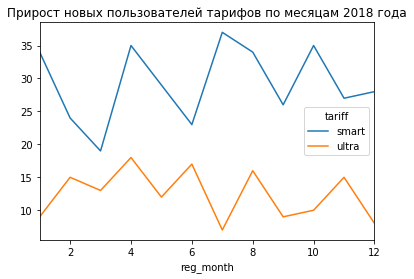

In [115]:
(data_users
            .pivot_table(index='reg_month', columns='tariff', values='user_id', aggfunc='count')
            .plot(title='Прирост новых пользователей тарифов по месяцам 2018 года')
)

In [116]:
data_users.pivot_table(index='reg_month', columns='tariff', values='user_id', aggfunc='count').corr()

tariff,smart,ultra
tariff,,
smart,1.000000,-0.253408
ultra,-0.253408,1.000000


Похоже, что есть определенное перетекание клиентов с одного тарифа на другой - поскольку как только число новых пользователей растет в одном тарифе, одновременно оно снижается в другом, но эта взаимосвязь не сильная как видим из коэффициентов корреляции.

In [117]:
#делаю временный df, чтобы оценить сколько было уникальных пользователей в каждый месяц 2018 года
data_calls_users_unique = data_calls_users.loc[:,['user_id','call_month','tariff']] #временная таблица нужна, чтобы не затерлись данные в основнй таблице
data_calls_users_unique['user_id_month'] = data_calls_users_unique['user_id'].astype('str') + data_calls_users_unique['call_month'].astype('str') # делаю уникальное сочетание 
data_calls_users_unique['user_id_month'] = data_calls_users_unique['user_id_month'].drop_duplicates() #отбрасываю все остальные звонки в течении месяца
data_calls_users_unique.dropna() #убираю из образовавшейся таблицы NaN
pass

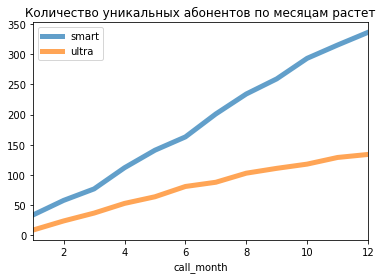

In [118]:
#вывожу графики по расчетам предыдущего блока - сколько уникальных пользователей каждый месяц
unique_users_smart = (data_calls_users_unique
                                    .query('tariff == "smart"') #and durtion == 0')
                                    .pivot_table(index="call_month", values="user_id_month", aggfunc="count")
                       )
unique_users_ultra = (data_calls_users_unique
                                    .query('tariff == "ultra"') # and duration == 0')
                                    .pivot_table(index="call_month", values="user_id_month", aggfunc="count")
                       )
ax = unique_users_smart.plot(kind='line', y='user_id_month', linewidth=5, alpha=0.7, label='smart', title='Количество уникальных абонентов по месяцам растет')
unique_users_ultra.plot(kind='line', y='user_id_month', linewidth=5, alpha=0.7, label='ultra', ax = ax)

__Проанализируем поведение клиентов: посмотрим кто менял тариф__

In [119]:
#промежуточные срезы данных по пользователям которые меняли тариф, чтобы выяснить как долго они оставались клиентами
data_users_changed = data_users.query('churn_date.isna() == False')
data_users_changed2 = data_users_changed.loc[:,['user_id', 'tariff', 'churn_date', 'reg_month']]
data_users_changed2['churn_date'] = pd.to_datetime(data_users_changed2['churn_date'] , format='%Y-%m-%d')
data_users_changed2['churn_month'] = data_users_changed2['churn_date'].dt.month
data_users_changed2['duration_month'] = data_users_changed2['churn_month'] - data_users_changed2['reg_month']

smart_dur = data_users_changed2.query('tariff == "smart"')['duration_month']
ultra_dur = data_users_changed2.query('tariff == "ultra"')['duration_month']

Проверим гипотезу, что пользователи тарифа `ultra` дольше остаются клиентами нежеле пользователи тарифа `smart`

- H0: Ср.длительность_смарт = Ср.длительность_ультра
- H1: Ср.длительность_смарт < Ср.длительность_ультра

In [120]:
alpha = 0.05
result_tariffs_duration = st.ttest_ind(smart_dur,
                       ultra_dur,
                       equal_var = False
                        )

print("p-значение: ", result_tariffs_duration.pvalue)
if result_tariffs_duration.pvalue < alpha:
    print("Отверграем нулевую гипотезу") and (smart_dur.mean() < ultra_dur.mean())
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  0.7607612303565653
Не можем отвергнуть нулевую гипотезу


__Подсчитайте для каждого пользователя: количество звонков и минут по месяцам__

_Здесь считаю фактические данные, а не округленные по тарифам_

In [121]:
#подсчитаем количество звонков для пользователей:
display("Количество звонков", data_calls_users
            .pivot_table(index=['user_id','call_month'], values='duration', aggfunc='count')
)

'Количество звонков'

duration
user_id call_month          
1000    5                 22
        6                 43
        7                 47
        8                 52
        9                 58
...                      ...
1498    10                41
1499    9                  9
        10                68
        11                74
        12                69

[3174 rows x 1 columns]

In [122]:
#подсчитаем длительность звонков для клиентов:
display("Длительность звонков, минут", data_calls_users
            .pivot_table(index=['user_id','call_month'], values='duration', aggfunc='sum')
)

'Длительность звонков, минут'

duration
user_id call_month          
1000    5             179.11
        6             246.05
        7             353.66
        8             447.97
        9             509.86
...                      ...
1498    10            300.17
1499    9              71.51
        10            594.55
        11            658.82
        12            554.34

[3174 rows x 1 columns]

_Теперь округлим данные по длительности звонков до ближайшей минуты согласно тарифу "Мегалайн" и подготовим данные к расчетам_

In [124]:
data_calls_users['duration_rounded'] = np.ceil(data_calls_users['duration'])

_Евгений спасибо! Исправил здесь `round` на `np.ceil`_

Тариф "Смарт".

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
___

Тариф "Ультра".

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

In [125]:
#название тарифа становится индексом для удобства поиска
data_tariffs.set_index('tariff_name', inplace=True)

In [126]:
smart_basic_pay = data_tariffs.loc['smart','rub_monthly_fee'] # 550 абонентская плата
ultra_basic_pay = data_tariffs.loc['ultra','rub_monthly_fee'] # 1950

smart_basic_minutes =  data_tariffs.loc['smart','minutes_included'] # 500 пакет минут
ultra_basic_minutes = data_tariffs.loc['ultra','minutes_included'] # 3000

smart_basic_messages = data_tariffs.loc['smart','messages_included'] # 50 пакет смс
ultra_basic_messages = data_tariffs.loc['ultra','messages_included'] # 1000

smart_basic_internet = data_tariffs.loc['smart','mb_per_month_included'] # 15000 пакем Мб
ultra_basic_internet = data_tariffs.loc['ultra','mb_per_month_included'] # 30000

smart_per_minute = smart_per_message = data_tariffs.loc['smart','rub_per_minute'] # 3 рубля за минуту сверх пакета и за каждое смс сверх, пакета
ultra_per_minute = ultra_per_message = data_tariffs.loc['ultra','rub_per_minute'] # 1

smart_per_gb = data_tariffs.loc['smart','rub_per_gb'] # 200 рублей за гб сверх пакета
ultra_per_gb = data_tariffs.loc['ultra','rub_per_gb'] # 150

In [127]:
#составляем промежуточную таблицу для расчета выручки по звонкам
data_calls_users_grouped = data_calls_users.pivot_table(index=['call_month','user_id'], columns='tariff', values='duration_rounded', aggfunc='sum')
#применяем функцию которая заменяет на ноль данные по тем абонентам что уложились во включенный пакет из 500 минут и 3000 минут соответственно
data_calls_users_grouped['smart'] = data_calls_users_grouped['smart'].apply(lambda x: 0 if x <= smart_basic_minutes else x-smart_basic_minutes)
data_calls_users_grouped['ultra'] = data_calls_users_grouped['ultra'].apply(lambda x: 0 if x <= ultra_basic_minutes else x-ultra_basic_minutes)

In [128]:
#делаем короткую функцию для расчета выручки за счет превышения лимита звонков
def revenue_calls(row):
    smart = row['smart']
    ultra = row['ultra']
    if smart >= 0:
        return(smart*smart_per_minute)
    if ultra >= 0:
        return(ultra*ultra_per_minute)

#также короткая функция расчета базовой абоненсткой платы    
def revenue_basic(row):
    smart = row['smart']
    ultra = row['ultra']
    if smart >=0:
        return(smart_basic_pay)
    if ultra >=0:
        return(ultra_basic_pay)
        

#применяем функцию
data_calls_users_grouped['revenue_basic'] = data_calls_users_grouped.apply(revenue_basic, axis=1) 
data_calls_users_grouped['revenue_calls'] = data_calls_users_grouped.apply(revenue_calls, axis=1) 
data_calls_users_grouped

tariff              smart  ultra  revenue_basic  revenue_calls
call_month user_id                                            
1          1005       0.0    NaN            550            0.0
           1032       0.0    NaN            550            0.0
           1045       0.0    NaN            550            0.0
           1055     170.0    NaN            550          510.0
           1071       0.0    NaN            550            0.0
...                   ...    ...            ...            ...
12         1494       0.0    NaN            550            0.0
           1495       NaN    0.0           1950            0.0
           1496     108.0    NaN            550          324.0
           1497     136.0    NaN            550          408.0
           1499      83.0    NaN            550          249.0

[3174 rows x 4 columns]

__Подсчитайте для каждого пользователя: количество отправленных сообщений по месяцам__

In [129]:
#подсчитаем количество сообщений:
display("Количество сообщений", data_messages_users
            .pivot_table(index=['user_id','message_month'], values='id', aggfunc='count')
)

'Количество сообщений'

id
user_id message_month    
1000    5              22
        6              60
        7              75
        8              81
        9              57
...                    ..
1498    10             42
1499    9              11
        10             48
        11             59
        12             66

[2717 rows x 1 columns]

In [131]:
#составляем промежуточную таблицу для расчета выручки по сообщениям
data_messages_users_grouped = data_messages_users.pivot_table(index=['message_month','user_id'], columns='tariff', values='id', aggfunc='count')
#применяем функцию которая заменяет на ноль данные по тем абонентам что уложились во включенный пакет из 50 минут и 1000 сообщений
data_messages_users_grouped['smart'] = data_messages_users_grouped['smart'].apply(lambda x: 0 if x <= smart_basic_messages else x-smart_basic_messages)
data_messages_users_grouped['ultra'] = data_messages_users_grouped['ultra'].apply(lambda x: 0 if x <= ultra_basic_messages else x-ultra_basic_messages)

In [132]:
#делаем короткую функцию для расчета выручки за счет превышения лимита сообщений
def revenue_messages(row):
    smart = row['smart']
    ultra = row['ultra']
    if smart >= 0:
        return(smart*smart_per_message)
    if ultra >= 0:
        return(ultra*ultra_per_message)      

#применяем функцию
data_messages_users_grouped['revenue_messages'] = data_messages_users_grouped.apply(revenue_messages, axis=1) 

__Подсчитайте для каждого пользователя: объем израсходованного интернет трафика по месяцам__

_Здесь фактический, не округленный по тарифу трафик_

In [133]:
#подсчитаем интернет трафик:
display("Объем трафика, Мб", data_internet_users
            .pivot_table(index=['user_id','session_month'], values='mb_used', aggfunc='sum')
)

'Объем трафика, Мб'

mb_used
user_id session_month          
1000    5               2780.31
        6              25867.87
        7              14530.46
        8              15109.57
        9              15622.55
...                         ...
1498    10             23514.26
1499    9               2113.99
        10             21812.11
        11             20645.71
        12             14396.78

[3203 rows x 1 columns]

_Теперь округлим данные по длительности интернет сессий до ближайшего Мб согласно тарифу "Мегалайн" и подготовим данные к расчетам_

In [134]:
data_internet_users['mb_used_rounded'] = np.ceil(data_internet_users['mb_used'])

In [137]:
#составляем промежуточную таблицу для расчета выручки по интернет трафику
data_internet_users_grouped = data_internet_users.pivot_table(index=['session_month','user_id'], columns='tariff', values='mb_used_rounded', aggfunc='sum')
#применяем функцию которая заменяет на ноль данные по тем абонентам что уложились во включенный пакет из 15 и 30 Гб
data_internet_users_grouped['smart'] = data_internet_users_grouped['smart'].apply(lambda x: 0 if x <= smart_basic_internet else x-smart_basic_internet)
data_internet_users_grouped['ultra'] = data_internet_users_grouped['ultra'].apply(lambda x: 0 if x <= ultra_basic_internet else x-ultra_basic_internet)

In [138]:
#делаем короткую функцию для расчета выручки за счет превышения лимита трафика
def revenue_internet(row):
    smart = row['smart']
    ultra = row['ultra']
    if smart >= 0:
        return(round(smart/1024,0) * smart_per_gb)
    if ultra >= 0:
        return(round(ultra/1024,0) * ultra_per_gb)      

#применяем функцию
data_internet_users_grouped['revenue_internet'] = data_internet_users_grouped.apply(revenue_internet, axis=1) 

_Готово :)_

__Подсчитайте для каждого пользователя: помесячную выручку__
___
Вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану.

In [139]:
#осталось объединить данные выручки по сегментам в единый массив с разбивкой по месяцам и пользователям
#перед этим составные индексы приводим к виду обычных колонок
data_calls_users_grouped = data_calls_users_grouped.reset_index(level=['call_month', 'user_id'])
data_messages_users_grouped = data_messages_users_grouped.reset_index(level=['message_month', 'user_id'])
data_internet_users_grouped = data_internet_users_grouped.reset_index(level=['session_month', 'user_id'])

In [140]:
#переименовываем название столбцов с месяцем для того, чтобы можно произвести merge дальше
data_calls_users_grouped.rename(columns={'call_month': 'month'}, inplace=True)
data_messages_users_grouped.rename(columns={'message_month': 'month'}, inplace=True)
data_internet_users_grouped.rename(columns={'session_month': 'month'}, inplace=True)

In [141]:
#делаем одну общу таблицу по выручке
data_revenue_combined = data_calls_users_grouped.merge(data_messages_users_grouped, on=['user_id','month'], how = 'outer')
data_revenue_combined = data_revenue_combined.merge(data_internet_users_grouped, on=['user_id','month'], how = 'outer')
data_revenue_combined = data_revenue_combined.merge(data_users, on='user_id', how = 'left')
data_revenue_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
month               3214 non-null int64
user_id             3214 non-null int64
smart_x             2223 non-null float64
ultra_x             951 non-null float64
revenue_basic       3174 non-null float64
revenue_calls       3174 non-null float64
smart_y             1922 non-null float64
ultra_y             795 non-null float64
revenue_messages    2717 non-null float64
smart               2228 non-null float64
ultra               975 non-null float64
revenue_internet    3203 non-null float64
age                 3214 non-null int64
churn_date          187 non-null object
city                3214 non-null object
first_name          3214 non-null object
last_name           3214 non-null object
reg_date            3214 non-null datetime64[ns]
tariff              3214 non-null object
reg_month           3214 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(4), object(5)
mem

In [142]:
#убираем из обобщенной таблицы все лишнее
data_revenue_combined = data_revenue_combined.drop(columns=['smart_x', 'ultra_x', 'smart_y', 'ultra_y', 'smart', 'ultra', 'age', 'first_name', 'last_name','reg_date', 'churn_date'])

In [143]:
#делаем короткую фукнцию, чтобы заполнить revenue_basic там где NaN
def revenue_basic2(row):
    revenue_basic = row['revenue_basic']
    tariff = row['tariff']
    
    if tariff == 'ultra':
        return(ultra_basic_pay)
    if tariff == 'smart':
        return(smart_basic_pay)

In [144]:
#применяем функцию
data_revenue_combined['revenue_basic'] = data_revenue_combined.apply(revenue_basic2, axis = 1)

In [145]:
#заменяем NaN на 0, чтобы посчитать revenue_total
data_revenue_combined['revenue_calls'] = data_revenue_combined['revenue_calls'].fillna(0)
data_revenue_combined['revenue_messages'] = data_revenue_combined['revenue_messages'].fillna(0)
data_revenue_combined['revenue_internet'] = data_revenue_combined['revenue_internet'].fillna(0)

__Помесячная выручка по каждому абоненту__

In [146]:
#считаем общую сумму
data_revenue_combined['revenue_total'] = (data_revenue_combined['revenue_basic'] +
                                          data_revenue_combined['revenue_calls'] +
                                          data_revenue_combined['revenue_messages'] +
                                          data_revenue_combined['revenue_internet']
                                         )
display(data_revenue_combined)

,month,user_id,revenue_basic,revenue_calls,revenue_messages,revenue_internet,city,tariff,reg_month,revenue_total
0,1,1005,550,0.0,0.0,0.0,Набережные Челны,smart,1,550.0
1,1,1032,550,0.0,0.0,2400.0,Ульяновск,smart,1,2950.0
2,1,1045,550,0.0,0.0,0.0,Улан-Удэ,smart,1,550.0
3,1,1055,550,510.0,0.0,600.0,Казань,smart,1,1660.0
4,1,1071,550,0.0,0.0,200.0,Омск,smart,1,750.0
...,...,...,...,...,...,...,...,...,...,...
3209,12,1231,1950,0.0,0.0,450.0,Чебоксары,ultra,5,2400.0
3210,12,1328,1950,0.0,0.0,1500.0,Мурманск,ultra,10,3450.0
3211,12,1473,1950,0.0,0.0,0.0,Красноярск,ultra,8,1950.0
3212,12,1489,550,0.0,0.0,800.0,Санкт-Петербург,smart,8,1350.0


In [147]:
#список городов миллионников
millionaire_cities = ['Москва', 'Санкт-Петербург', 'Ново-Сибирск', 'Екатеринбург', 'Казань','Нижний Новгород',
                      'Челябинск', 'Самара', 'Омск', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Воронеж', 'Пермь', 'Волгоград'
                     ]

In [148]:
#print('Тула' in millionaire_cities) # это я проверял проходил ли Тула в города миллионники

In [149]:
#сделаем функцию, чтобы отдельно выделить города миллионики и все остальные
def millionare_city1(city):
    if city in millionaire_cities:
        return('миллионники')
    else:
        return('не миллионники')
    
#и также функцию которая указаные называние города миллионника, а всем остальным присваивает "прочие"

def millionare_city2(city):
    if city in millionaire_cities:
        return(city)
    else:
        return('прочие')

In [150]:
data_revenue_combined['millionaire_city_type'] = data_revenue_combined['city'].apply(millionare_city1)
data_revenue_combined['millionaire_city'] = data_revenue_combined['city'].apply(millionare_city2)

__Оценим в каких городах клиенты "Мегалайн" тратят на связь больше всего__

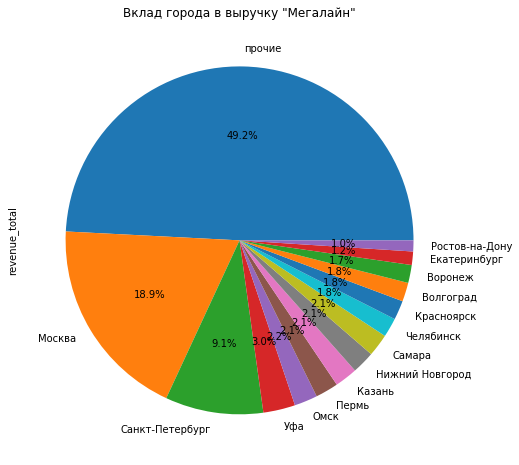

In [151]:
split_by_city = (data_revenue_combined
                                            .groupby('millionaire_city')['revenue_total']
                                            .sum()
                                            .sort_values(ascending=False)/data_revenue_combined.groupby('city')['revenue_total'].sum().sum()
                                            
)
split_by_city.plot(kind='pie', figsize = (8,8), autopct='%1.1f%%', title='Вклад города в выручку "Мегалайн"')

Оценим в каких городах клиенты "Мегалайн" предпочитают какой тариф

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf2187210>],
      dtype=object)

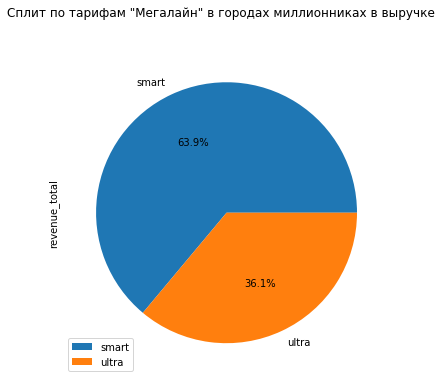

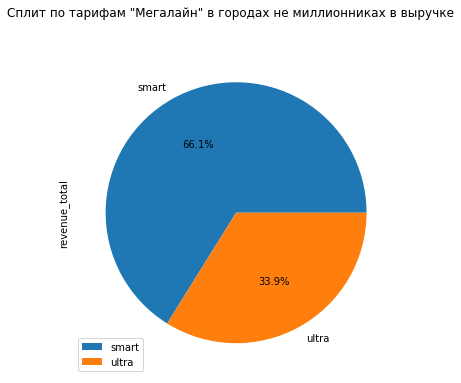

In [152]:
millionaire_cities_tariffs = (data_revenue_combined
                    .query('millionaire_city_type == "миллионники"')
                    .pivot_table(index='tariff', values='revenue_total', aggfunc='sum')
)

non_millionaire_cities_tariffs = (data_revenue_combined
                    .query('millionaire_city_type == "не миллионники"')
                    .pivot_table(index='tariff', values='revenue_total', aggfunc='sum')
)


millionaire_cities_tariffs.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', subplots = True, title='Сплит по тарифам "Мегалайн" в городах миллионниках в выручке')
non_millionaire_cities_tariffs.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', subplots = True, title='Сплит по тарифам "Мегалайн" в городах не миллионниках в выручке')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf21c3110>],
      dtype=object)

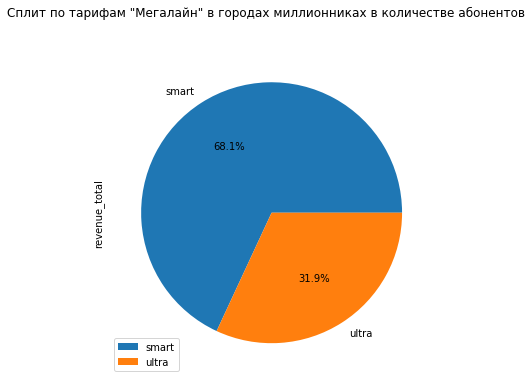

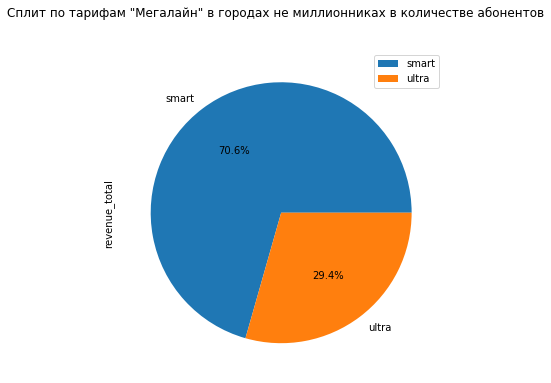

In [153]:
millionaire_cities_tariffs = (data_revenue_combined
                    .query('millionaire_city_type == "миллионники"')
                    .pivot_table(index='tariff', values='revenue_total', aggfunc='count')
)

non_millionaire_cities_tariffs = (data_revenue_combined
                    .query('millionaire_city_type == "не миллионники"')
                    .pivot_table(index='tariff', values='revenue_total', aggfunc='count')
)


millionaire_cities_tariffs.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', subplots = True, title='Сплит по тарифам "Мегалайн" в городах миллионниках в количестве абонентов')
non_millionaire_cities_tariffs.plot(kind='pie', figsize = (6,6), autopct='%1.1f%%', subplots = True, title='Сплит по тарифам "Мегалайн" в городах не миллионниках в количестве абонентов')

### Вывод:

1. Мы подготовили данные заменил 0.0 на медианные значения по каждому пользователю.
1. Мы также начали проводить анализ предпочтений клиентов "Мегалайн", так в частности:
___
- количество абонентов на каждом из тарифных планов заметно увеличивается в течение 2018 года, но рост на тарифе `smart` происходит быстрее, что в интуитивно можно связать, с более низкой ценой данного тарифа
- мы тажке обратили внимание, что в месяц когда наблюдается рост притока новых пользователей одного тарифа, рост новких клиентов другого тарифа несколько снижается, что также логично поскольку в каждый отдельный месяц поддерживается (возможно рекламируется) какой-то один тарифный план
- мы постарались оценить с помощью статистической гипотезы какова длительность пользования тарифами и отличается ли она. Проверка показала, что с большой вероятностью клиенты одинаково долго пользуются обоими тарифами, что может свидетельствовать, что оба тарифа одинаково устраивают своих пользователей
- затем мы вывели данные о количестве минут/сообщений и мб-трафика которое необходимо каждому пользователю в месяц, по фактическому времени
- и затем уже с учетом особенностей тарифного плана подсчитали выручку приходящуюся на каждого пользователя
- мы выяснили, что примерно 50% продаж в денежном и количественном выражении приходится на города с населением более 1 млн человек, а самый популярный тариф все-таки смарт не зависимо от места положения пользователя

## Шаг 3: Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
___

Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения
___

__По длительности звонков__

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


'Распределение звонков в месяц'

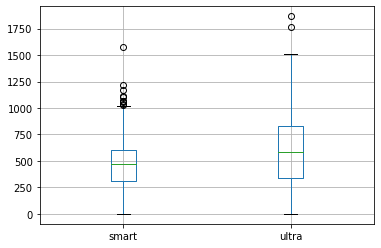

In [154]:
display("Распределение звонков в месяц", data_calls_users
            .pivot_table(index=['user_id','call_month'], columns='tariff', values='duration', aggfunc='sum')
            .boxplot()
)

'Потрачено минут на звонки в течении месяца'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf22633d0>,
      dtype=object)

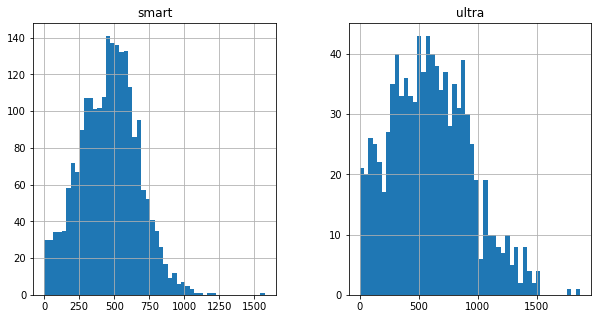

In [155]:
display('Потрачено минут на звонки в течении месяца', data_calls_users
            .pivot_table(index=['user_id','call_month'], columns='tariff', values='duration', aggfunc='sum')
            .hist(bins=50, figsize=(10,5))

)

In [156]:
#среднее
(data_calls_users
            .pivot_table(index=['user_id','call_month'], columns='tariff', values='duration', aggfunc='sum')
            .mean()

)

tariff
smart    464.480508
ultra    602.643822
dtype: float64

In [157]:
#дисперсия
(data_calls_users
            .pivot_table(index=['user_id','call_month'], columns='tariff', values='duration', aggfunc='sum')
            .var()

)

tariff
smart     43019.181436
ultra    114026.922992
dtype: float64

In [158]:
#альтернативный способ расчет дисперсии для выборки по тарифу 'smart' совпадает с вычислением выше, 
#поэтому используем более удобную запись сверху
np.var(data_calls_users
            .query('tariff == "smart"')
            .pivot_table(index=['user_id','call_month'], values='duration', aggfunc='sum'),ddof=1)

duration    43019.181436
dtype: float64

In [159]:
#стандартное отклонение
(data_calls_users
            .pivot_table(index=['user_id','call_month'], columns='tariff', values='duration', aggfunc='sum')
            .std()

)

tariff
smart    207.410659
ultra    337.678727
dtype: float64

In [160]:
#print("Распределение индивидуальных звонков",data_calls_users.boxplot(column='duration'))
#plt.show()

### Вывод:
Оба распределения похожы на распределения Пуассона - количество/частота событий "звонки" в единицу времени (месяц).

Пользователи тарифа `smart`:
1. чаще всего укладываются в объем разговоров до 1000 минут, при том, что ~66% используют ~280-600 минут;
1. среднее значение 464 минуты в месяц
1. можно ожидать, что 464+/-207: от 257 до 671 минут будет использовано пользователем тарифа, однако есть и те пользователи, которые выходят за рамки 1000 минут

Пользователи тарифа `ultra`:
1. чаще всего укладываются в объем разговоров до 1500 минут.
1. среднее значение 602 минуты в месяц
1. можно ожидать что 602+/-337: от 265 до 939 минут будет использовано большинством клиентов этого тарифа

__По количеству сообщений__

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


'Использовано сообщений в месяц'

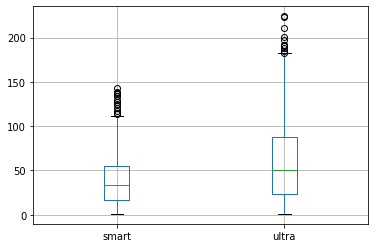

In [161]:
display("Использовано сообщений в месяц", data_messages_users
            .pivot_table(index=['user_id','message_month'], columns='tariff', values='id', aggfunc='count')
            .boxplot()
)

'Использовано сообщений в месяц'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf235d450>,
      dtype=object)

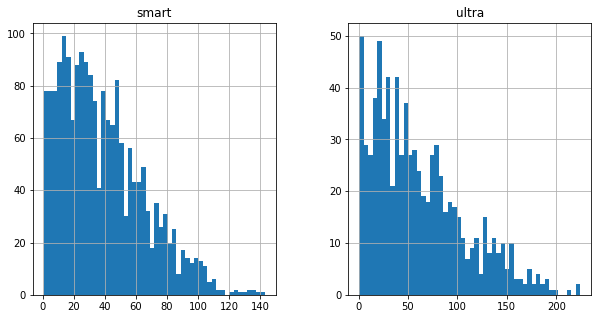

In [162]:
display("Использовано сообщений в месяц", data_messages_users
            .pivot_table(index=['user_id','message_month'], columns='tariff', values='id', aggfunc='count')
            .hist(bins=50, figsize=(10,5))
)

In [163]:
(data_messages_users
            .pivot_table(index=['user_id','message_month'], columns='tariff', values='id', aggfunc='count')
            .mean()
)

tariff
smart    38.716441
ultra    61.161006
dtype: float64

In [164]:
(data_messages_users
            .pivot_table(index=['user_id','message_month'], columns='tariff', values='id', aggfunc='count')
            .var()
)

tariff
smart     717.594201
ultra    2109.659183
dtype: float64

In [165]:
(data_messages_users
            .pivot_table(index=['user_id','message_month'], columns='tariff', values='id', aggfunc='count')
            .std()
)

tariff
smart    26.787949
ultra    45.931026
dtype: float64

### Вывод:

Также как и по звонкам, распределение отправленных сообщений похоже на распределение Пуассона.

Пользователи тарифа `smart`:
1. чаще всего укладываются в ~120 сообщений (исходя из графиков)
1. среднее значение 38 сообщений в месяц
1. можно ожидать, что 38+/-26: от 12 до 64 сообщений будет использовано пользователем тарифа

Пользователи тарифа `ultra`:
1. чаще всего укладываются в ~170 сообщений
1. среднее значение 61 сообщение в месяц
1. можно ожидать что 61+/-45: от 16 до 106 сообщений будет использовано большинством клиентов этого тарифа

__По объему трафика__

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


'Использовано интернет-трафика за месяц'

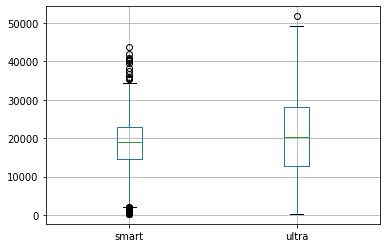

In [166]:
display("Использовано интернет-трафика за месяц", data_internet_users
            .pivot_table(index=['user_id','session_month'], columns = 'tariff', values='mb_used', aggfunc='sum')
            .boxplot()
)

'Использовано интернет-трафика в среднем за месяц'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf53caa50>,
      dtype=object)

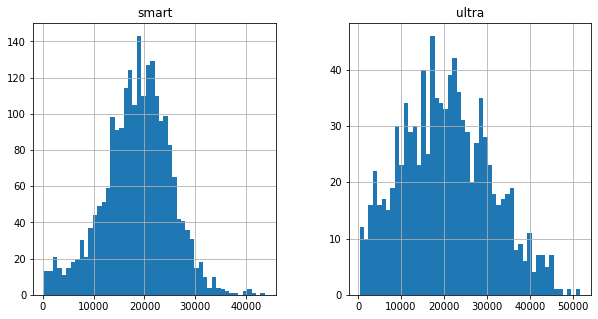

In [167]:
display("Использовано интернет-трафика в среднем за месяц", data_internet_users
            .pivot_table(index=['user_id','session_month'], columns = 'tariff', values='mb_used', aggfunc='sum')
            .hist(bins=50, figsize=(10,5))
)

In [168]:
(data_internet_users
            .pivot_table(index=['user_id','session_month'], columns = 'tariff', values='mb_used', aggfunc='sum')
            .mean()
)

tariff
smart    18591.627388
ultra    20575.182308
dtype: float64

In [169]:
(data_internet_users
            .pivot_table(index=['user_id','session_month'], columns = 'tariff', values='mb_used', aggfunc='sum')
            .var()
)

tariff
smart    4.342983e+07
ultra    1.072387e+08
dtype: float64

In [170]:
(data_internet_users
            .pivot_table(index=['user_id','session_month'], columns = 'tariff', values='mb_used', aggfunc='sum')
            .std()
)

tariff
smart     6590.131450
ultra    10355.611276
dtype: float64

### Вывод:

Распределение использованного трафика похоже на нормальное распределение, но чуть скошенное вправо на тарифе ультра и скошенное влево на тарифе смарт.

Пользователи тарифа `smart`:
1. чаще всего укладываются в ~35 Гб (исходя из графиков)
1. среднее значение 18 Гб в месяц
1. можно ожидать, что 18+/-6: от 12 до 24 Гб будет использовано пользователем тарифа в течении месяца

Пользователи тарифа `ultra`:
1. чаще всего укладываются в ~50 Гб
1. среднее значение 20 Гб в месяц
1. можно ожидать что 20+/-10: от 10 до 30 Гб будет использовано большинством клиентов этого тарифа

## Шаг 4: Проверьте гипотезы

__Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается__

Сформулируем гипотезы так:
- H0 = Ср.выручка_пользователи_тарифа_Ультра = Ср.выручка_пользователи_тарифа_Смарт
- H1 = Ср.выручка_пользователи_тарифа_Ультра > Ср.выручка_пользователи_тарифа_Смарт

Используем "гипотезу о равенстве средних двух генеральных совокупностей"

In [171]:
revenue_smart = data_revenue_combined[data_revenue_combined['tariff'] == 'smart']['revenue_total']
revene_ultra = data_revenue_combined[data_revenue_combined['tariff'] == 'ultra']['revenue_total']
alpha = 0.05 # критерий статистической значимости

In [172]:
results_hyp_1 = st.ttest_ind(revenue_smart,
                       revene_ultra,
                       equal_var = False
                        )

In [173]:
print("p-значение: ", results_hyp_1.pvalue)
if results_hyp_1.pvalue < alpha and revenue_smart.mean() < revene_ultra.mean():
    print("Отверграем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  2.8860335007414165e-45
Отверграем нулевую гипотезу


In [174]:
data_revenue_combined[data_revenue_combined['tariff'] == 'smart']['revenue_total'].mean()

1721.0031404217139

In [175]:
data_revenue_combined[data_revenue_combined['tariff'] == 'smart']['revenue_total'].median()

1550.0

In [176]:
data_revenue_combined[data_revenue_combined['tariff'] == 'ultra']['revenue_total'].mean()

2096.192893401015

In [177]:
data_revenue_combined[data_revenue_combined['tariff'] == 'ultra']['revenue_total'].median()

1950.0

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


'Разброс выручки по тарифам'

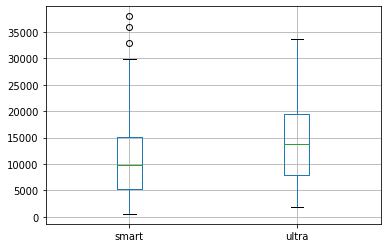

In [178]:
display("Разброс выручки по тарифам", data_revenue_combined
            .pivot_table(index='user_id', columns = 'tariff', values='revenue_total', aggfunc='sum')
            .boxplot()
)

Проверка гипотезы показала, что мы не можем подтвердить равенство средней выручка пользователей тарифов Ультра и Смарт. В нашем случае верна альтернативная гипотеза: средняя выручка по тарифу Ультра выше, чем по тарифу Смарт.

__Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов__

Сформулируем гипотезы так:
- H0 = Ср.выручка_пользователи_Москвы = Ср.выручка_пользователи_другие_города
- H1 = Ср.выручка_пользователи_Москвы != Ср.выручка_пользователи_другие_города

Используем "гипотезу о равенстве средних двух генеральных совокупностей"

In [179]:
revenue_Moscow = data_revenue_combined[data_revenue_combined['city'] == 'Москва']['revenue_total']
revene_non_Moscow = data_revenue_combined[data_revenue_combined['city'] != 'Москва']['revenue_total']

In [180]:
results_hyp_2 = st.ttest_ind(revenue_Moscow,
                       revene_non_Moscow,
                       equal_var = False
                        )

In [181]:
print("p-значение: ", results_hyp_2.pvalue)
if results_hyp_2.pvalue < alpha:
    print("Отверграем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  0.728473476079514
Не можем отвергнуть нулевую гипотезу


У нас ~83% вероятности, что средняя выручка пользователей Москвы и других городов схожи, слишком много чтобы отвергнуть нулевую гипотезу. Также на данных выше (круговая диаграмма) мы видели, что на Москву и другие города миллионники приходится порядка 50% и оставшуиеся города вторые 50%.

__Проверю насколько выручка с тарифа соотносится с затратами__

Исхожу из того, что мб интернета, минута звонка и одно сообщение имеют одинаковую стоимость (в затратах) для "Мегалайн"

In [182]:
#по звонкам
#при этом полагаю, что стоимость минуты звонка для компании "Мегалайн" одинаковая
data_calls_users_grouped2 = data_calls_users.pivot_table(index=['user_id','call_month'], values = 'duration', aggfunc='sum')
data_calls_users_grouped2 = data_calls_users_grouped2.reset_index(level=['user_id', 'call_month'])
data_calls_users_grouped2.rename(columns={'call_month': 'month'}, inplace=True)
revenue_vs_cost_calls = data_revenue_combined.merge(data_calls_users_grouped2, on=['user_id','month'], how='left')
revenue_vs_cost_calls['revenue_per_minute'] = revenue_vs_cost_calls['revenue_calls'] / revenue_vs_cost_calls['duration']
revenue_vs_cost_calls.pivot_table(index='tariff', values='revenue_per_minute', aggfunc='mean')

,revenue_per_minute
tariff,
smart,0.364333
ultra,0.000000


In [183]:
#проведу аналогичный расчет по выручке с одного смс сообщения по разным тарифам
data_messages_users_grouped2 = data_messages_users.pivot_table(index=['user_id','message_month'], values = 'id', aggfunc='count')
data_messages_users_grouped2 = data_messages_users_grouped2.reset_index(level=['message_month', 'user_id'])
data_messages_users_grouped2.rename(columns={'message_month': 'month', 'id': 'messages_sent'}, inplace=True)
revenue_vs_cost_messages = data_revenue_combined.merge(data_messages_users_grouped2, on=['user_id','month'], how='left')
revenue_vs_cost_messages['revenue_per_message'] = revenue_vs_cost_messages['revenue_messages'] / revenue_vs_cost_messages['messages_sent']
revenue_vs_cost_messages.pivot_table(index='tariff', values='revenue_per_message', aggfunc='mean')

,revenue_per_message
tariff,
smart,0.244
ultra,0.000


In [184]:
#и наконец, аналогичный расчет для использования интернет трафика
data_internet_users_grouped2 = data_internet_users.pivot_table(index=['user_id','session_month'], values = 'mb_used', aggfunc='sum')
data_internet_users_grouped2 = data_internet_users_grouped2.reset_index(level=['user_id', 'session_month'])
data_internet_users_grouped2.rename(columns={'session_month': 'month'}, inplace=True)
revenue_vs_cost_internet = data_revenue_combined.merge(data_internet_users_grouped2, on=['user_id','month'], how='left')
revenue_vs_cost_internet['revenue_per_mb'] = revenue_vs_cost_internet['revenue_internet'] / revenue_vs_cost_internet['mb_used']
revenue_vs_cost_internet.pivot_table(index='tariff', values='revenue_per_mb', aggfunc='mean')

,revenue_per_mb
tariff,
smart,0.037646
ultra,0.003739


In [185]:
revenue_vs_cost_messages.query('tariff == "smart"')['messages_sent'].mean()

38.71644120707596

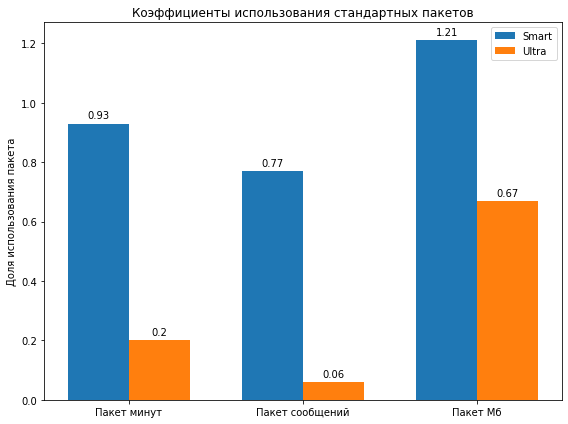

In [186]:
#задаем данные для постраения grouped bar chart
labels_usage = ['Пакет минут', 'Пакет сообщений', 'Пакет Мб']

smart_usage = [(revenue_vs_cost_calls.query('tariff == "smart"')['duration'].mean() / smart_basic_minutes).round(2), 
               (revenue_vs_cost_messages.query('tariff == "smart"')['messages_sent'].mean() / smart_basic_messages).round(2), 
               (revenue_vs_cost_internet.query('tariff == "smart"')['mb_used'].mean()/ smart_basic_internet).round(2)
              ]

ultra_usage = [(revenue_vs_cost_calls.query('tariff == "ultra"')['duration'].mean() / ultra_basic_minutes).round(2), 
               (revenue_vs_cost_messages.query('tariff == "ultra"')['messages_sent'].mean() / ultra_basic_messages).round(2), 
               (revenue_vs_cost_internet.query('tariff == "ultra"')['mb_used'].mean()/ ultra_basic_internet).round(2)
              ]

x = np.arange(len(labels_usage))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, smart_usage, width, label='Smart')
rects2 = ax.bar(x + width/2, ultra_usage, width, label='Ultra')

ax.set_ylabel('Доля использования пакета')
ax.set_title('Коэффициенты использования стандартных пакетов')
ax.set_xticks(x)
ax.set_xticklabels(labels_usage)
ax.legend()

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Общий вывод:

1. В 2018 году тариф приносивший большую долю выручки - это `smart` ~ 64%, однако выручка приходящаяся на одного абонента в этом тарифе ниже, чем у тарифа `ultra` примерно на 25% (сравниваю ср.выручка ultra по отношению к smart). Кроме того затраты абонентов `ultra` больше скошены вправо, что говорит о большем потенциале роста продаж в этом тарифе. 
1. Мы увидели что пользователи `smart` существенно чаще не укладываются в базовый пакет и им приходится доплачивать за услуги, а среднее использование трафика, количества сообщений и звонков в целом в двух тарифах не сильно отличаются, хоть и разброс значений в тарифе `ultra` гораздо шире.
1. Основную прибыльность тарифа `ultra` формирует абонентская плата, в то время как по тарифу `smart` это постоянные доплаты за превышение в основном интернет трафика.


_Мы делаем вывод, что для продвижения будет лучше направлять средства на поддержку тарифа `ultra`, как тариф с большим потенциалом роста трат абонентов, с большей прибыльностью (за счет абонентской платы) и средней выручкой статистически значимо большей чем у другого тарифа._

__Комментарий по ходу работы:__

1. Мы начали с предобработки данных: в частности удалили лишний столбец в таблице `data_internet`, исследовали природу нулевых значений звонков/интернет сессий и произвели замену нулей на медианные значений по каждому пользователю. 
1. После чего мы начали готовить данные для анализа, в частности создали таблицы подсчитывающие использование методов связи в среднем по месяцу.
1. Также мы обратили внимание, что в целом с начала 2018 года произошел рост количества пользователей обоих тарифов, но по более премиальному тарифу `ultra` рост ожидаемо был ниже и доля тарифа в течении года составила примерно ~36% в выручке "Мегалайн". К тому же, среди тех клиентов кто отказался от "Мегалайн" были как те кто пользовался Ультра, так и те кто пользовался Смарт в среднем оставались клиентами по 4 месяца (здесь проверили гипотезу о равенстве средней длительности пользования). Ожидаемо количество пользователей "Мегалайн" оказалось больше в крупных городах Москве и Санкт-Петербурге, в остальных городах миллионниках доли примерно одинаковые. 
1. Во время анализа данных удалось выявить, что в среднем выручка по тарифу Ультра равно, как и разброс больше нежели по тарифу Смарт. Уже ближе к концу исследования мы посмотрели как расходуется стандартные пакеты в каждом из тарифов.
1. В задании по проверке статистических гипотез мы задавали нулевой гипотезой гипотезы о равенстве. В частности гипотеза о равенстве средней выручке по тарифам была отвергнута, а гипотеза о равенстве по выручке между Москвой и другими городами не была отвергнута.